## My ML model

Frame
Acquire
Refine
Transform
Explore
Model
Insight
Build
Deploy

## Frame

In [126]:
# Load the libraries

# For data ingestion and wrangling
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt

#For machine learning
from sklearn import tree

# For deployment(for serilisation and API)
from sklearn.externals import joblib
import firefly

In [127]:
%matplotlib inline

## Acquire

In [128]:
#Load the data
df=pd.read_csv("data/historical_usage.csv")

In [129]:
df.head()

,cpuUsage,memoryUsage,userName,poolName,dayOfTheWeek,hourOfTheDay
0,648,1410,Balrog,IndiaMarketing,Monday,16
1,1531,623,Gandalf,APACPreSales,Thursday,4
2,1687,1936,Frodo,IndiaMarketing,Tuesday,10
3,1731,1152,Samwise,APACPreSales,Wednesday,14
4,863,1859,Saruman,IndiaMarketing,Monday,6


In [130]:
df.shape

(6901, 6)

## Refine

In [131]:
df.isnull().sum()

cpuUsage        0
memoryUsage     0
userName        0
poolName        0
dayOfTheWeek    0
hourOfTheDay    0
dtype: int64

In [132]:
df.dropna(axis=0, inplace= True)

## Explore

In [133]:
df.isnull().sum()

cpuUsage        0
memoryUsage     0
userName        0
poolName        0
dayOfTheWeek    0
hourOfTheDay    0
dtype: int64

In [134]:
df.shape

(6901, 6)

In [135]:
df.dtypes

cpuUsage         int64
memoryUsage      int64
userName        object
poolName        object
dayOfTheWeek    object
hourOfTheDay     int64
dtype: object

In [136]:
type(df.cpuUsage)

pandas.core.series.Series

In [137]:
df.describe()

,cpuUsage,memoryUsage,hourOfTheDay
count,6901.000000,6901.000000,6901.000000
mean,1652.026663,1278.056224,11.595276
std,794.546565,443.872543,6.966822
min,251.000000,512.000000,0.000000
25%,972.000000,895.000000,6.000000
50%,1661.000000,1282.000000,12.000000
75%,2342.000000,1656.000000,18.000000
max,3000.000000,2048.000000,23.000000


In [138]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

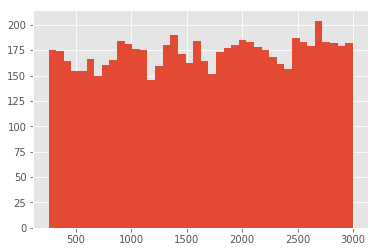

In [139]:
# Distriubtion
df.cpuUsage.hist(bins=40)


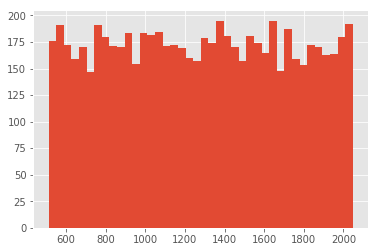

In [140]:
df.memoryUsage.hist(bins=40)


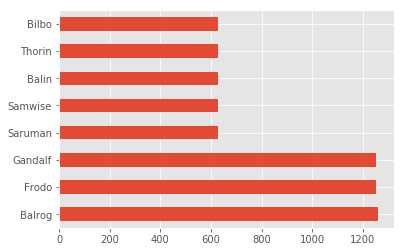

In [141]:
# Bar plots ( for cat vars)
df.userName.value_counts().plot.barh()

In [142]:
dfbalrog = df.loc[df['userName'] == 'Balrog']
dfbalrog.head()

,cpuUsage,memoryUsage,userName,poolName,dayOfTheWeek,hourOfTheDay
0,648,1410,Balrog,IndiaMarketing,Monday,16
8,1781,1056,Balrog,IndiaMarketing,Thursday,9
11,1812,538,Balrog,APACPreSales,Monday,10
19,1099,726,Balrog,APACPreSales,Monday,14
22,1521,2024,Balrog,IndiaMarketing,Thursday,12


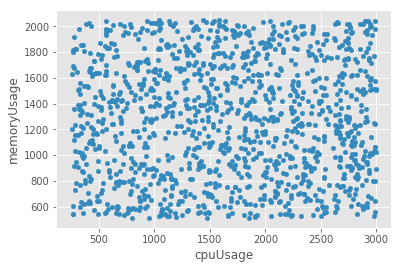

In [143]:
dfbalrog.plot.scatter(x = 'cpuUsage', y = 'memoryUsage', alpha = 1)

## Transform

In [144]:
#df['log_age'] = np.log(df.age)
#df['log_income'] = np.log(df.income)

In [145]:
#df.plot.scatter(x = 'log_age', y = 'log_income', c='default',alpha = 0.2, cmap = 'viridis')

## Build the Model

Build a simple tree model

In [175]:
# Build a classifier
features = df[['hourOfTheDay','memoryUsage']]
target = df['cpuUsage']
clf = tree.DecisionTreeClassifier(max_depth=10).fit(features, target)

In [184]:
#Predict
predAttempt1 = [[4, 1200]]

In [185]:
predAttempt1

[[4, 1200]]

In [194]:
pred = clf.predict(predAttempt1)[0]

In [152]:
# Serialize the model
joblib.dump(clf, 'simple-model.pkl')

['simple-model.pkl']

In [217]:
%%file simple.py
# Make an API

# Load the libraries
import numpy as np
from sklearn.externals import joblib

#Load the model
model = joblib.load('simple-model.pkl')

#Create a predict function
def predict(hourOfTheDay, memoryUsage):
    features= [[hourOfTheDay, memoryUsage]]
    prob = model.predict(features)[0]
    return prob[:0]

Overwriting simple.py


In [218]:
import simple

In [219]:
simple.predict(7, 1410)

ValueError: too many values to unpack (expected 2)

,actual,predicted,probability
0,648,2271,0.000000
1,1531,1347,0.003344
2,1687,2289,0.000000
3,1731,2271,0.000000
4,863,647,0.003311


ValueError: too many values to unpack (expected 2)

## Deploy

In [76]:
#import firefly

In [78]:
#simple = firefly.Client("http://127.0.0.1:8000")

In [83]:
#simple.predict(age=30, amount= 10500)

0.4878048780487805